# 1.  Import the necessary libraries for preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2.  Change settings to see the maximum amount of columns

In [2]:
pd.set_option('display.max_columns', 500)

# 3.  Read in the dataset

In [3]:
df=pd.read_csv('C:/Users/chadc/Downloads/DATA SCIENCE MAIN COURSE/Capstone Project/df_ready_for_EDA.csv')

# 4.  Inspect the shape and info of the dataset

In [4]:
df.shape

(1460, 82)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1460 non-null   int64  
 1   Id             1460 non-null   int64  
 2   MSSubClass     1460 non-null   int64  
 3   MSZoning       1460 non-null   object 
 4   LotFrontage    1460 non-null   float64
 5   LotArea        1460 non-null   int64  
 6   Street         1460 non-null   object 
 7   Alley          1460 non-null   object 
 8   LotShape       1460 non-null   object 
 9   LandContour    1460 non-null   object 
 10  Utilities      1460 non-null   object 
 11  LotConfig      1460 non-null   object 
 12  LandSlope      1460 non-null   object 
 13  Neighborhood   1460 non-null   object 
 14  Condition1     1460 non-null   object 
 15  Condition2     1460 non-null   object 
 16  BldgType       1460 non-null   object 
 17  HouseStyle     1460 non-null   object 
 18  OverallQ

# 5.  Drop an unwanted an unecessary column

In [6]:
df.drop(columns = 'Unnamed: 0', inplace=True)

# 6.  Separate the dataframe into numerical and categorical columns for feature engineering

In [7]:
num_col = [col for col in df.columns if (df[col].dtype == 'int64' or df[col].dtype == 'float64')]
num_col

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [8]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
cat_var = [i for i in df.columns if df[i].dtype == 'object']
cat_var

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

# FEATURE ENGINEERING

# 7.  Create two new columns that may make the features more dynamic.  First is the age of the property and second is the amount of time between when it was remodeled and when the house was sold.

In [10]:
df['age_of_prop'] = df['YrSold'] - df['YearBuilt']

In [11]:
df['yrs_bt_remod/sell'] = df['YrSold'] - df['YearRemodAdd']

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 83 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 1460 non-null   int64  
 1   MSSubClass         1460 non-null   int64  
 2   MSZoning           1460 non-null   object 
 3   LotFrontage        1460 non-null   float64
 4   LotArea            1460 non-null   int64  
 5   Street             1460 non-null   object 
 6   Alley              1460 non-null   object 
 7   LotShape           1460 non-null   object 
 8   LandContour        1460 non-null   object 
 9   Utilities          1460 non-null   object 
 10  LotConfig          1460 non-null   object 
 11  LandSlope          1460 non-null   object 
 12  Neighborhood       1460 non-null   object 
 13  Condition1         1460 non-null   object 
 14  Condition2         1460 non-null   object 
 15  BldgType           1460 non-null   object 
 16  HouseStyle         1460 

# Inspect the type of data and utilize one-hot encoding and the get_dummies() feature of pandas

In [13]:
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [14]:
df = pd.get_dummies(df, columns=['MSZoning'], prefix='zoning', drop_first=True)

In [15]:
df.shape

(1460, 86)

In [16]:
df['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [17]:
df = pd.get_dummies(df, columns=['Street'], prefix='street', drop_first=True)

In [18]:
df.shape

(1460, 86)

In [19]:
df.groupby('LotShape').count()['Id']

LotShape
IR1    484
IR2     41
IR3     10
Reg    925
Name: Id, dtype: int64

In [20]:
def lot_shape(x):
    if x == 'IR3':
        return 0
    elif x == 'IR2':
        return 1 
    elif x == 'IR1':
        return 2 
    elif x == 'Reg':
        return 3
df['LotShape'] = df['LotShape'].map(lot_shape)

In [21]:
df.shape

(1460, 86)

In [22]:
df['LandContour'].value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [23]:
df = pd.get_dummies(df, columns=['LandContour'], prefix='land_contour', drop_first=True)

In [24]:
df.shape

(1460, 88)

In [25]:
df.groupby('Utilities').count()['Id']

Utilities
AllPub    1459
NoSeWa       1
Name: Id, dtype: int64

In [26]:
def utilities(x):
    if x == 'NoSeWa':
        return 0 
    elif x == 'AllPub':
        return 1

df['Utilities'] = df['Utilities'].map(utilities)

In [27]:
df.shape

(1460, 88)

In [28]:
df['LotConfig'].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [29]:
df = pd.get_dummies(df, columns=['LotConfig'], prefix='lot_conf', drop_first=True)

In [30]:
df.shape

(1460, 91)

In [31]:
df['LandSlope'].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [32]:
def landslope(x):
    if x == 'Sev':
        return 0
    elif x == 'Mod':
        return 1 
    elif x == 'Gtl':
        return 2 

df['LandSlope'] = df['LandSlope'].map(landslope)

In [33]:
df = pd.get_dummies(df, columns=['Neighborhood'], prefix='neigh', drop_first=True)

In [34]:
df = pd.get_dummies(df, columns=['Condition1'], prefix='cond1', drop_first=True)

In [35]:
df = pd.get_dummies(df, columns=['Condition2'], prefix='cond1', drop_first=True)

In [36]:
df = pd.get_dummies(df, columns=['BldgType'], prefix='bldg_type', drop_first=True)

df = pd.get_dummies(df, columns=['HouseStyle'], prefix='house_style', drop_first=True)

df = pd.get_dummies(df, columns=['RoofStyle'], prefix='roof_style', drop_first=True)

df = pd.get_dummies(df, columns=['RoofMatl'], prefix='roof_mat', drop_first=True)

df = pd.get_dummies(df, columns=['Exterior1st'], prefix='extfirst', drop_first=True)

df = pd.get_dummies(df, columns=['Exterior2nd'], prefix='extsecond', drop_first=True)

df = pd.get_dummies(df, columns=['MasVnrType'], prefix='mas_vnr_type', drop_first=True)

df = pd.get_dummies(df, columns=['Foundation'], prefix='fnd', drop_first=True)

df = pd.get_dummies(df, columns=['Heating'], prefix='heat', drop_first=True)

df = pd.get_dummies(df, columns=['CentralAir'], prefix='ctrl_air', drop_first=True)

df = pd.get_dummies(df, columns=['GarageType'], prefix='gar_type', drop_first=True)

df = pd.get_dummies(df, columns=['MiscFeature'], prefix='misc_feat', drop_first=True)

df = pd.get_dummies(df, columns=['SaleType'], prefix='sale_type', drop_first=True)

In [37]:
df['ExterQual'].value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [38]:

def exterqual(x):
    if x == 'Po':
        return 0
    elif x == 'Fa':
        return 1 
    elif x == 'TA':
        return 2
    elif x == 'Gd':
        return 3
    elif x == 'Ex':
        return 4

df['ExterQual'] = df['ExterQual'].map(exterqual)

In [39]:
def extercond(x):
    if x == 'Po':
        return 0
    elif x == 'Fa':
        return 1 
    elif x == 'TA':
        return 2
    elif x == 'Gd':
        return 3
    elif x == 'Ex':
        return 4

df['ExterCond'] = df['ExterCond'].map(extercond)

In [40]:
def bsmtqual(x):
    if x == 'None':
        return 0
    elif x == 'Po':
        return 1
    elif x == 'Fa':
        return 2 
    elif x == 'TA':
        return 3
    elif x == 'Gd':
        return 4
    elif x == 'Ex':
        return 5

df['BsmtQual'] = df['BsmtQual'].map(bsmtqual)

In [41]:
def bsmtcond(x):
    if x == 'None':
        return 0
    elif x == 'Po':
        return 1
    elif x == 'Fa':
        return 2 
    elif x == 'TA':
        return 3
    elif x == 'Gd':
        return 4
    elif x == 'Ex':
        return 5

df['BsmtCond'] = df['BsmtCond'].map(bsmtcond)

In [42]:
def bsmtexposure(x):
    if x == 'None':
        return 0
    elif x == 'No':
        return 1
    elif x == 'Mn':
        return 2 
    elif x == 'Av':
        return 3
    elif x == 'Gd':
        return 4

df['BsmtExposure'] = df['BsmtExposure'].map(bsmtexposure)

In [43]:
def bsmtfintype1(x):
    if x == 'None':
        return 0
    elif x == 'Unf':
        return 1
    elif x == 'LwQ':
        return 2 
    elif x == 'Rec':
        return 3
    elif x == 'BLQ':
        return 4
    elif x == 'ALQ':
        return 5
    elif x == 'GLQ':
        return 6

df['BsmtFinType1'] = df['BsmtFinType1'].map(bsmtfintype1)

In [44]:
def bsmtfintype2(x):
    if x == 'None':
        return 0
    elif x == 'Unf':
        return 1
    elif x == 'LwQ':
        return 2 
    elif x == 'Rec':
        return 3
    elif x == 'BLQ':
        return 4
    elif x == 'ALQ':
        return 5
    elif x == 'GLQ':
        return 6

df['BsmtFinType2'] = df['BsmtFinType2'].map(bsmtfintype2)

In [45]:
 def heatingqc(x):
    if x == 'Po':
        return 0
    elif x == 'Fa':
        return 1
    elif x == 'TA':
        return 2 
    elif x == 'Gd':
        return 3
    elif x == 'Ex':
        return 4

df['HeatingQC'] = df['HeatingQC'].map(heatingqc)

In [46]:
def electrical(x):
    if x == 'Mix':
        return 0
    elif x == 'FuseP':
        return 1
    elif x == 'FuseF':
        return 2 
    elif x == 'FuseA':
        return 3
    elif x == 'SBrkr':
        return 4

df['Electrical'] = df['Electrical'].map(electrical)

In [47]:
def functional(x):
    if x == 'Sal':
        return 0
    elif x == 'Sev':
        return 1
    elif x == 'Maj2':
        return 2 
    elif x == 'Maj1':
        return 3
    elif x == 'Mod':
        return 4
    elif x == 'Min2':
        return 5
    elif x == 'Min1':
        return 6
    elif x == 'Typ':
        return 7

df['Functional'] = df['Functional'].map(functional)

In [48]:
def fireplacequ(x):
    if x == 'None':
        return 0
    elif x == 'Po':
        return 1
    elif x == 'Fa':
        return 2
    elif x == 'TA':
        return 3 
    elif x == 'Gd':
        return 4
    elif x == 'Ex':
        return 5

df['FireplaceQu'] = df['FireplaceQu'].map(fireplacequ)

In [49]:
def garagefinish(x):
    if x == 'None':
        return 0
    elif x == 'Unf':
        return 1
    elif x == 'RFn':
        return 2
    elif x == 'Fin':
        return 3 

df['GarageFinish'] = df['GarageFinish'].map(garagefinish)

In [50]:
def garagequal(x):
    if x == 'None':
        return 0
    elif x == 'Po':
        return 1
    elif x == 'Fa':
        return 2
    elif x == 'TA':
        return 3 
    elif x == 'Gd':
        return 4
    elif x == 'Ex':
        return 5

df['GarageQual'] = df['GarageQual'].map(garagequal)

In [51]:
def garagecond(x):
    if x == 'None':
        return 0
    elif x == 'Po':
        return 1
    elif x == 'Fa':
        return 2
    elif x == 'TA':
        return 3 
    elif x == 'Gd':
        return 4
    elif x == 'Ex':
        return 5

df['GarageCond'] = df['GarageCond'].map(garagecond)

In [52]:
def paveddrive(x):
    if x == 'N':
        return 0
    elif x == 'P':
        return 1
    elif x == 'Y':
        return 2

df['PavedDrive'] = df['PavedDrive'].map(paveddrive)

In [53]:
def poolqc(x):
    if x == 'None':
        return 0
    elif x == 'Fa':
        return 1
    elif x == 'TA':
        return 2 
    elif x == 'Gd':
        return 3
    elif x == 'Ex':
        return 4

df['PoolQC'] = df['PoolQC'].map(poolqc)

In [54]:
def fence(x):
    if x == 'None':
        return 0
    elif x == 'MnWw':
        return 1
    elif x == 'GdWo':
        return 2 
    elif x == 'MnPrv':
        return 3
    elif x == 'GdPrv':
        return 4

df['Fence'] = df['Fence'].map(fence)

In [55]:
df.shape

(1460, 198)

In [56]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,Alley,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,age_of_prop,yrs_bt_remod/sell,zoning_FV,zoning_RH,zoning_RL,zoning_RM,street_Pave,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_conf_CulDSac,lot_conf_FR2,lot_conf_FR3,lot_conf_Inside,neigh_Blueste,neigh_BrDale,neigh_BrkSide,neigh_ClearCr,neigh_CollgCr,neigh_Crawfor,neigh_Edwards,neigh_Gilbert,neigh_IDOTRR,neigh_MeadowV,neigh_Mitchel,neigh_NAmes,neigh_NPkVill,neigh_NWAmes,neigh_NoRidge,neigh_NridgHt,neigh_OldTown,neigh_SWISU,neigh_Sawyer,neigh_SawyerW,neigh_Somerst,neigh_StoneBr,neigh_Timber,neigh_Veenker,cond1_Feedr,cond1_Norm,cond1_PosA,cond1_PosN,cond1_RRAe,cond1_RRAn,cond1_RRNe,cond1_RRNn,cond1_Feedr,cond1_Norm,cond1_PosA,cond1_PosN,cond1_RRAe,cond1_RRAn,cond1_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_mat_CompShg,roof_mat_Membran,roof_mat_Metal,roof_mat_Roll,roof_mat_Tar&Grv,roof_mat_WdShake,roof_mat_WdShngl,extfirst_AsphShn,extfirst_BrkComm,extfirst_BrkFace,extfirst_CBlock,extfirst_CemntBd,extfirst_HdBoard,extfirst_ImStucc,extfirst_MetalSd,extfirst_Plywood,extfirst_Stone,extfirst_Stucco,extfirst_VinylSd,extfirst_Wd Sdng,extfirst_WdShing,extsecond_AsphShn,extsecond_Brk Cmn,extsecond_BrkFace,extsecond_CBlock,extsecond_CmentBd,extsecond_HdBoard,extsecond_ImStucc,extsecond_MetalSd,extsecond_Other,extsecond_Plywood,extsecond_Stone,extsecond_Stucco,extsecond_VinylSd,extsecond_Wd Sdng,extsecond_Wd Shng,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,fnd_CBlock,fnd_PConc,fnd_Slab,fnd_Stone,fnd_Wood,heat_GasA,heat_GasW,heat_Grav,heat_OthW,heat_Wall,ctrl_air_Y,gar_type_Attchd,gar_type_Basment,gar_type_BuiltIn,gar_type_CarPort,gar_type_Detchd,gar_type_None,misc_feat_None,misc_feat_Othr,misc_feat_Shed,misc_feat_TenC,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,1,60,65.0,8450,None,3,1,2,7,5,2003,2003,1,3,2,4,3,1,6,706,1,0,150,856,4,4,856,854,0,1710,1,0,2,1,3,1,Gd,8,7,0,0,1,2,2,548,3,3,2,0,61,0,0,0,0,0,0,0,2,2008,Normal,208500,5,5,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,2,20,80.0,9600,None,3,1,2,6,8,1976,1976,2,2,2,4,3,4,5,978,1,0,284,1262,4,4,1262,0,0,1262,0,1,2,0,3,1,TA,6,7,1,3,2,2,2,460,3,3,2,298,0,0,0,0,0,0,0,0,5,2007,Normal,181500,31,31,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,3,60,68.0,11250,None,2,1,2,7,5,2001,2002,3,3,2,4,3,2,6,486,1,0,434,920,4,4,920,866,0,1786,1,0,2,1,3,1,Gd,6,7,1,3,3,2,2,608,3,3,2,0,42,0,0,0,0,0,0,0,9,2008,Normal,223500,7,6,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0

# 8.  Compartmentalize the data and divide it into two groups to do a correlation analysis

In [57]:
# Look at the first 58 columns for correlation targets
fst_group = list(df.columns[0:58])
fst_group.remove('Id')
fst_group.append('SalePrice')


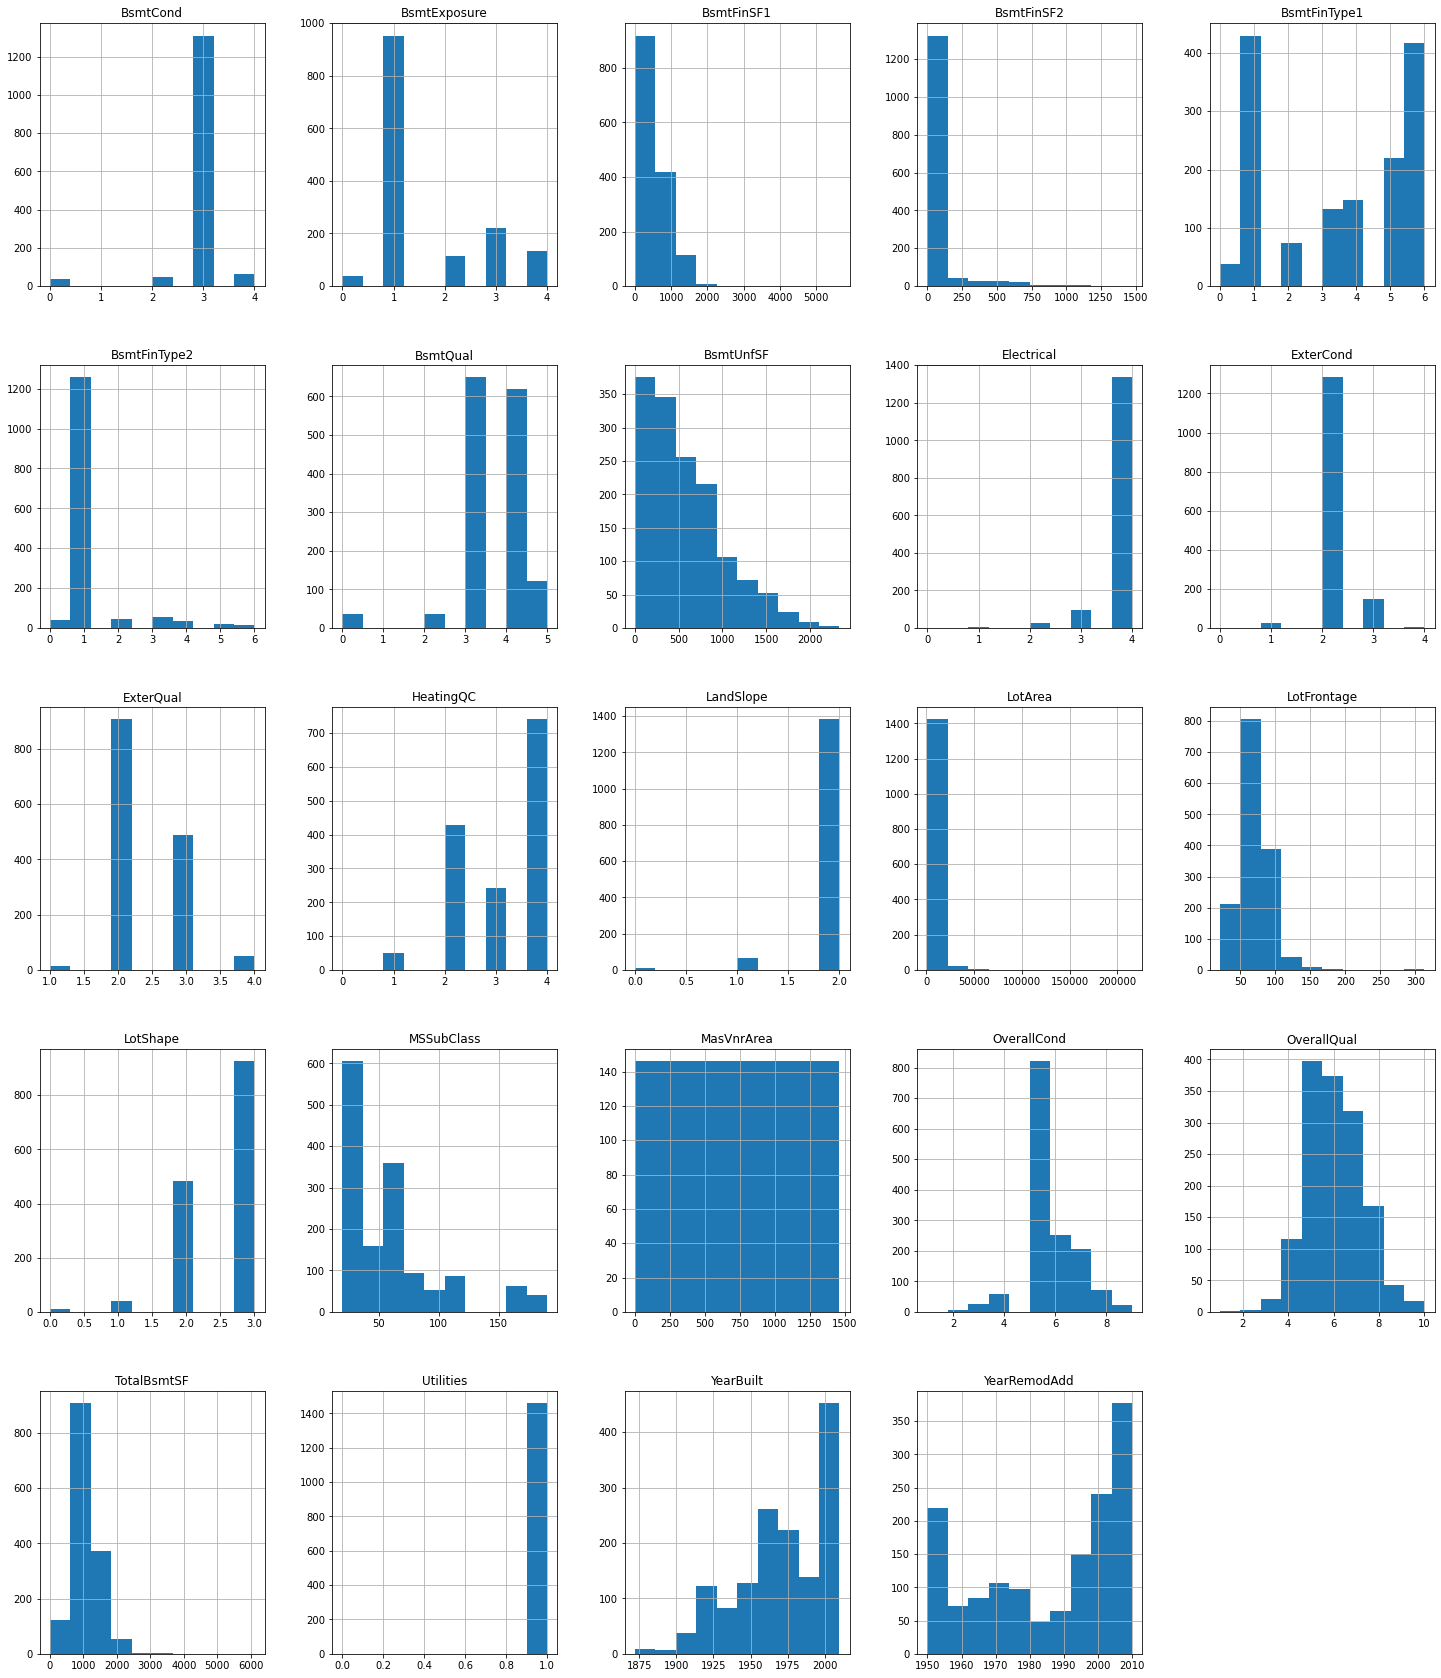

In [58]:
df[fst_group[:25]].hist(figsize=(25,30));

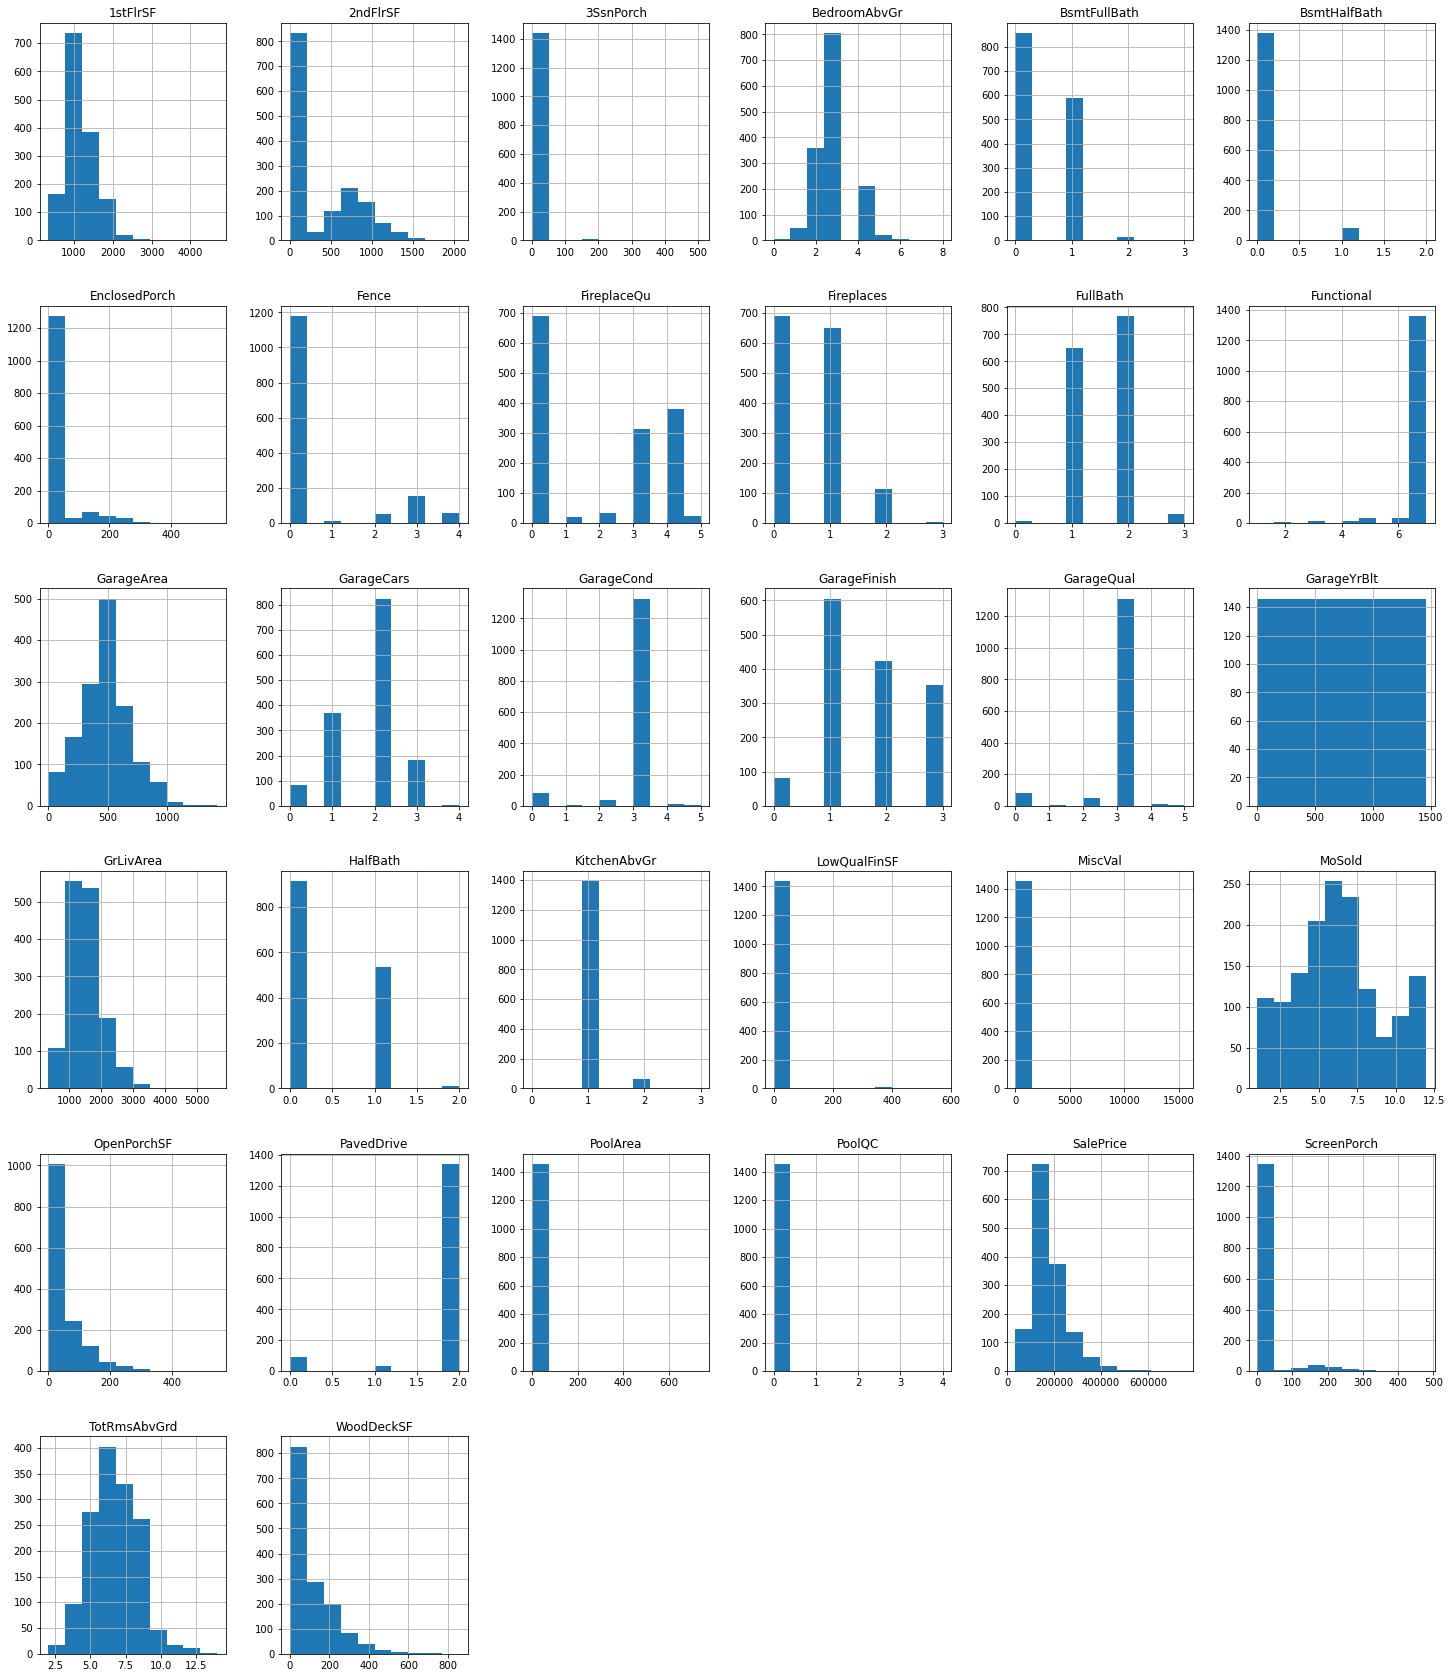

In [59]:
df[fst_group[25:]].hist(figsize=(25,30))
plt.show()

# 9.  Find the correlation of the first set of features to the target variable ('Sale Price')

In [60]:
fst_group_corr = df[fst_group].corr()

In [61]:
fst_group_corr = fst_group_corr[fst_group_corr['SalePrice'] > .2][['SalePrice']]

In [62]:
fst_group_corr = fst_group_corr.sort_values('SalePrice', ascending=False)
fst_group_corr

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
ExterQual,0.682639
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
BsmtQual,0.585207
FullBath,0.560664


In [63]:
len(fst_group_corr.index)

33

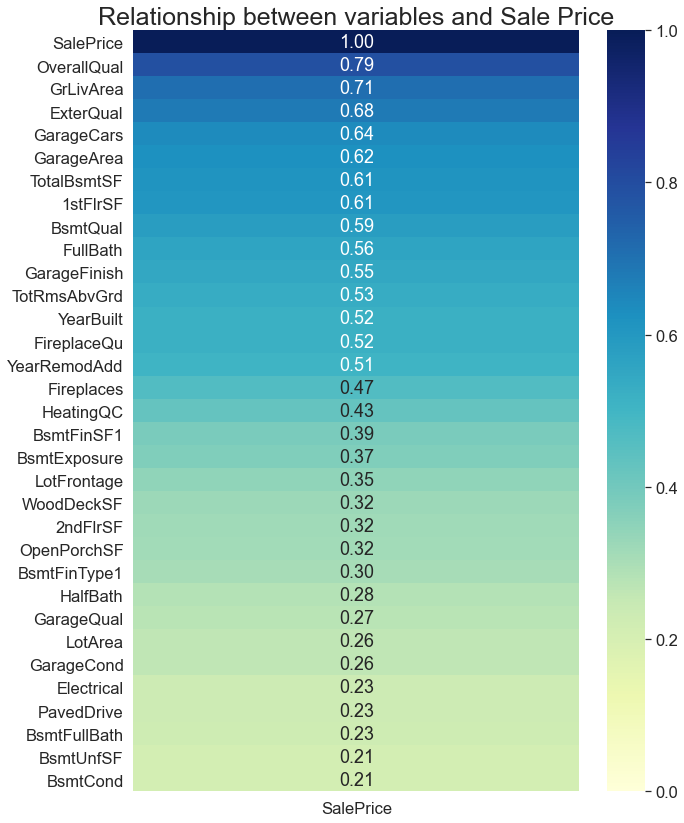

In [64]:
#plot heatmap
sns.set(font_scale=1.5)
plt.figure(figsize=(10,14));
sns.heatmap(fst_group_corr,  vmin=0, vmax=1, cmap='YlGnBu', annot=True, fmt='.2f');
plt.title('Relationship between variables and Sale Price', fontdict={'fontsize':25});

According to the heatmap, Overall quality has the highest positive correlation to Sale Price.  This will be an important feature to pay attention to.  The garage, the exterior, and also the square footage play an important role in determining housing prices.  The more space increases the value of the house.  The kitchen area and the fireplace also have a relatively high correlation with Sale Price.

# 9.  Find the positive correlation as well as the negative correlation of the second set of features to the target variable ('Sale Price')

In [65]:
sec_group = list(df.columns[58:])
sec_group_corr = df[sec_group].corr()

In [66]:
sec_group_corr.shape

(153, 153)

In [67]:
sec_corr = sec_group_corr[(sec_group_corr['SalePrice'] < -0.2) | (sec_group_corr['SalePrice'] > 0.2)][['SalePrice']]

In [68]:
sec_corr1 = sec_corr.sort_values('SalePrice', ascending=False)
sec_corr1

,SalePrice
SalePrice,1.000000
fnd_PConc,0.497734
neigh_NridgHt,0.402149
sale_type_New,0.357509
gar_type_Attchd,0.335961
mas_vnr_type_Stone,0.330476
neigh_NoRidge,0.330424
extsecond_VinylSd,0.306389
extfirst_VinylSd,0.305009
ctrl_air_Y,0.251328


In [69]:
len(sec_corr1.index)

24

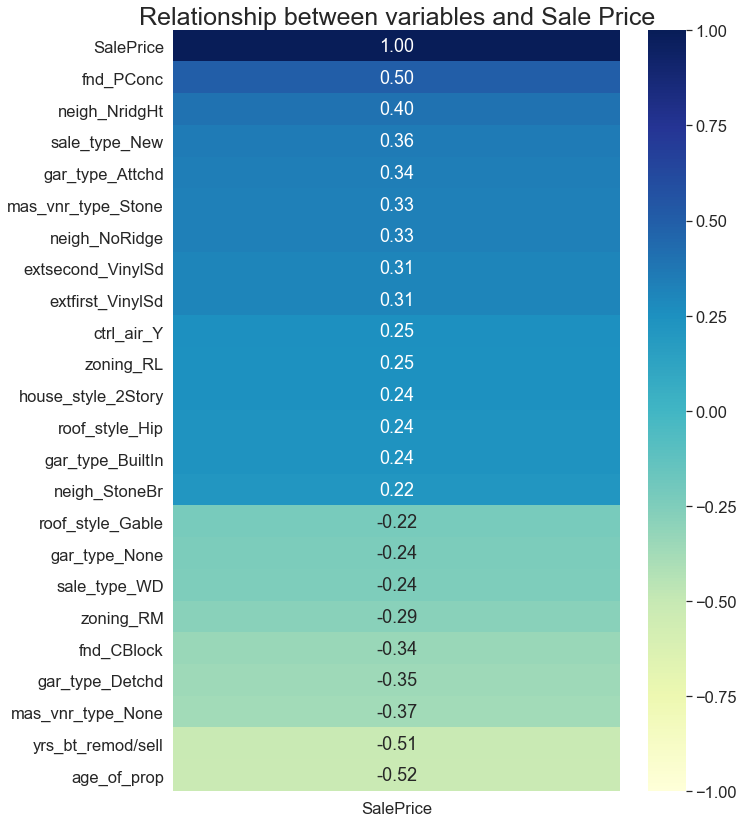

In [70]:
sns.set(font_scale=1.5)
plt.figure(figsize=(10,14));
sns.heatmap(sec_corr1,  vmin=-1, vmax=1, cmap='YlGnBu', annot=True, fmt='.2f');
plt.title('Relationship between variables and Sale Price', fontdict={'fontsize':25});

With this feature engineering, we run into the challenge of arbitrarily manipulating the features when multicollinearity is present.  

In my analysis, I noticed that the age of the property is highly negatively correlated with Sale Price of the house.  It folls the logic that the older the house is, negatively affects the sale price of the house.

Cinder Block Foundation and the detached garage also have negative correlations to the sale price.  


# 10.  Combine all of the features and omit the ones that are only correlated with themselves or have a low correlation to the sale price.  Then remove the target variable to consolidate all of the features.  Then remove the variables which are not really continuous variables

In [71]:
print(len(fst_group_corr))
print(len(sec_corr1))

33
24


In [72]:
features_final = [x.strip() for x in sec_corr1.index]
features_final.extend([x.strip() for x in fst_group_corr.index])
features_final.remove('SalePrice')
features_final.remove('SalePrice')
features_final.remove('YearBuilt')
features_final.remove('yrs_bt_remod/sell')

In [73]:
len(features_final)

53

In [74]:
features_corr = df[features_final].corr()
features_corr = features_corr[abs(features_corr) > .6]
features_corr.shape

(53, 53)

In [75]:
for col in features_corr.columns:
    if features_corr[col].isna().sum() == (features_corr.shape[0]-1):
        features_corr.drop(col, axis=0, inplace=True)
        features_corr.drop(col, axis=1, inplace=True)

In [76]:
features_corr.shape

(35, 35)

In [77]:
features_corr.columns

Index(['fnd_PConc', 'sale_type_New', 'gar_type_Attchd', 'extsecond_VinylSd',
       'extfirst_VinylSd', 'zoning_RL', 'house_style_2Story', 'roof_style_Hip',
       'roof_style_Gable', 'gar_type_None', 'sale_type_WD', 'zoning_RM',
       'fnd_CBlock', 'gar_type_Detchd', 'age_of_prop', 'OverallQual',
       'GrLivArea', 'ExterQual', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'BsmtQual', 'FullBath', 'TotRmsAbvGrd', 'FireplaceQu',
       'Fireplaces', 'BsmtFinSF1', '2ndFlrSF', 'BsmtFinType1', 'HalfBath',
       'GarageQual', 'GarageCond', 'BsmtFullBath', 'BsmtCond'],
      dtype='object')

In [78]:
features_final.remove('sale_type_New')
features_final.remove('sale_type_WD')
features_final.remove('house_style_2Story')
features_final.remove('gar_type_Attchd')
features_final.remove('GarageCars')
features_final.remove('Fireplaces')

In [79]:
len(features_final)

47

The sale_type features were removed and seem to be irrelevant to the analysis.  It should not matter how a house was obtained or would affect the sale price of a house.  

2 story house was removed because there already is a feature there for 2nd floor square footage.  There seems to be collinearity here as a house would have to be a 2 story house to have 2nd floor square footage.  

Garage attached or detached are also related.  It should be a binary feature in the sense that if there is a garage, either it is attached or it is not.  Therefore, we will remove one of them so as not to affect the variance of the model too much.  The same goes for Garage Cars and Garage area.  The size of the garage is dependent upon how many vehicles it can fit.  Since they essentially represent the same thing, we can drop one of those columns.  

Fireplaces and fireplace quality essentially represent the same thing.  So we'll drop the one with the lower correlation

In [83]:
df = df[features_final]

In [84]:
df.to_csv('features_final.csv', index=False)